# Cointegration test-YOY & All-Quarters. Quarter_End


In [48]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller

In [49]:
date = pd.date_range(start = '1982-01-01',end= '2022-01-01',freq = 'Y')


In [50]:
date

DatetimeIndex(['1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31',
               '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31',
               '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31',
               '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31',
               '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [51]:
date = date.to_period('Y')
date

PeriodIndex(['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
             '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
             '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
             '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
             '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
            dtype='period[A-DEC]', freq='A-DEC')

In [52]:
#we genrated a series of data starting from 1982  till 2021 on a yearly basis

In [53]:
ECI_CPI = pd.read_excel('Average YOY_original.xlsx',sheet_name='YOY')

#pulled the ECI vs CPI YOY data

In [54]:
ECI_CPI.columns

Index(['CPI_YOY_Q1', 'CPI_YOY_Q2', 'CPI_YOY_Q3', 'CPI_YOY_Q4', 'ECI_YOY_Q1',
       'ECI_YOY_Q2', 'ECI_YOY_Q3', 'ECI_YOY_Q4'],
      dtype='object')

In [55]:
ECI_CPI.head()

,CPI_YOY_Q1,CPI_YOY_Q2,CPI_YOY_Q3,CPI_YOY_Q4,ECI_YOY_Q1,ECI_YOY_Q2,ECI_YOY_Q3,ECI_YOY_Q4
0,0.075930,0.070640,0.050429,0.038298,0.070667,0.075,0.073,0.064
1,0.035979,0.025773,0.028601,0.037910,0.066000,0.065,0.059,0.058
2,0.048008,0.042211,0.042701,0.039487,0.059000,0.054,0.051,0.052
3,0.037037,0.037608,0.031429,0.037987,0.047000,0.047,0.048,0.043
4,0.022556,0.017658,0.017544,0.010979,0.041000,0.040,0.038,0.035


In [56]:
ECI_CPI['index'] = date

In [57]:
ECI_CPI.set_index("index",inplace =True)


In [58]:
#we club the yearly data with the ECI vs CPI YOY data

In [59]:
ECI_CPI.head()

,CPI_YOY_Q1,CPI_YOY_Q2,CPI_YOY_Q3,CPI_YOY_Q4,ECI_YOY_Q1,ECI_YOY_Q2,ECI_YOY_Q3,ECI_YOY_Q4
index,,,,,,,,
1982,0.075930,0.070640,0.050429,0.038298,0.070667,0.075,0.073,0.064
1983,0.035979,0.025773,0.028601,0.037910,0.066000,0.065,0.059,0.058
1984,0.048008,0.042211,0.042701,0.039487,0.059000,0.054,0.051,0.052
1985,0.037037,0.037608,0.031429,0.037987,0.047000,0.047,0.048,0.043
1986,0.022556,0.017658,0.017544,0.010979,0.041000,0.040,0.038,0.035


In [60]:
type(ECI_CPI.index)
# we ensured that the index of our data is a  period index since we would be testing the data for 
#stationarity and cointegration, it is important for the data to a time series data.

pandas.core.indexes.period.PeriodIndex

# ECI_YOY_Q1 vs CPI_YOY_Q1 

## Line Plot

In [61]:
ECI_CPI_temp = ECI_CPI[['ECI_YOY_Q1','CPI_YOY_Q1']].iloc[1:,:]
ECI_CPI_temp

,ECI_YOY_Q1,CPI_YOY_Q1
index,,
1983,0.066,0.035979
1984,0.059,0.048008
1985,0.047,0.037037
1986,0.041,0.022556
1987,0.033,0.030331
1988,0.042,0.039251
1989,0.048,0.049785
1990,0.055,0.052330
1991,0.045,0.048951


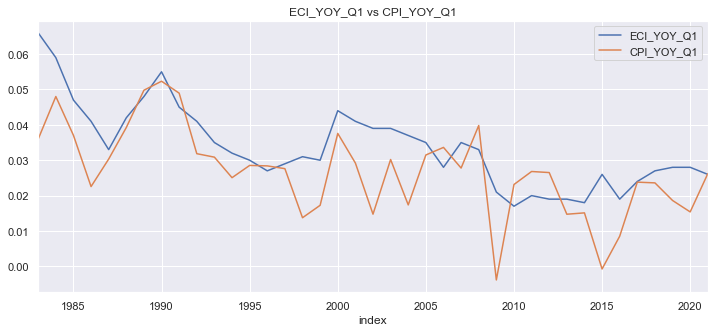

In [62]:

ECI_CPI_temp[['ECI_YOY_Q1','CPI_YOY_Q1']].plot(figsize = (12,5),legend = True,title= 'ECI_YOY_Q1 vs CPI_YOY_Q1')
plt.show()


## Scatter Plot

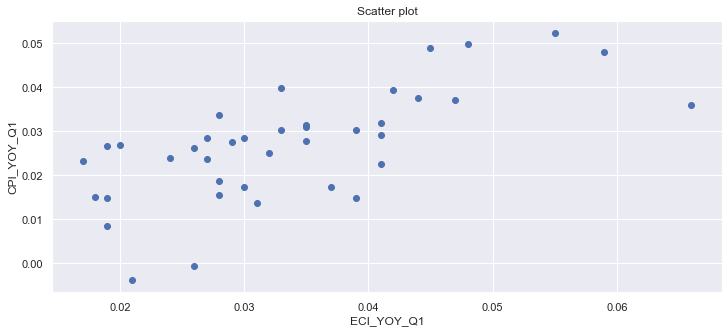

In [63]:
plt.figure(figsize = (12,5))
plt.scatter(ECI_CPI_temp['ECI_YOY_Q1'],ECI_CPI_temp['CPI_YOY_Q1'])
plt.xlabel("ECI_YOY_Q1")
plt.ylabel("CPI_YOY_Q1")
plt.title("Scatter plot")

plt.show()
 

## Correlation

In [64]:
correlation = ECI_CPI_temp['ECI_YOY_Q1'].corr(ECI_CPI_temp['CPI_YOY_Q1'])
correlation


0.6809764950117214

We see that the correlation is 0.6809, which is fairly strong

## Test for stationarity

### Augmented Dickey Fuller Test

In [28]:
def ADF(series,title=''):
    print(f'The Augmented Dickey Fuller Test: {title}')

    result = adfuller(series,autolag='AIC') # Augmented Dickey Fuller test is a statistical test to check for stationarity. 
    
    labels = ['ADF test Statistic',"p-value","lags used","observations"]
    out = pd.Series(result[0:4],index = labels)
    
    for key,val in result[4].items():
        out[f'the critical value ({key})'] = val
    print(out.to_string())
    
    if result[1]<=0.05:
       
        print("Reject the null hypothesis")
        print(f'The {title} series is stationary')
    if result[1]>0.05:
        print("Accept the null hypothesis")
        print(f'The {title } series is non-stationary ')
        


In [29]:
ADF(ECI_CPI_temp['CPI_YOY_Q1'],'CPI_YOY_Q1')

The Augmented Dickey Fuller Test: CPI_YOY_Q1
ADF test Statistic          -3.652552
p-value                      0.004832
lags used                    0.000000
observations                38.000000
the critical value (1%)     -3.615509
the critical value (5%)     -2.941262
the critical value (10%)    -2.609200
Reject the null hypothesis
The CPI_YOY_Q1 series is stationary


In [30]:
ADF(ECI_CPI_temp['ECI_YOY_Q1'],'ECI_YOY_Q1')

The Augmented Dickey Fuller Test: ECI_YOY_Q1
ADF test Statistic          -3.049263
p-value                      0.030543
lags used                    0.000000
observations                38.000000
the critical value (1%)     -3.615509
the critical value (5%)     -2.941262
the critical value (10%)    -2.609200
Reject the null hypothesis
The ECI_YOY_Q1 series is stationary


Both CPI_YOY_Q1 & ECI_YOY_Q1 are stationary. 

## Test for Cointegration

In [42]:
import statsmodels.tsa.stattools as ts

### Johansen Test

In [43]:
def cointegration_test(data1,data2,title =''):
    print(f'The Johansen cointegration test for {title} is: ')
    result = ts.coint(data1,data2,autolag='aic')#Johansen test is used to check cointegration 
    result
    labels = ["t -statistic","#p value"]
    out = pd.Series(result[0:2],index= labels)
    
    for key,val in dict(zip(['1%','2%','3%'],result[2])).items():
        out[f' the critical value {(key)} is : '] = val
       
   
    
    print(out.to_string())
    print("\n")
    if result[1]<=0.05:
        
        
        print("Reject the Null hypothesis")
        print("The series are cointegrated  ")
        print("\n")
        
    if result[1]>0.05:
        
       
        print("We Accept the Null hypothesis")
        print("There is no cointegration between the series ")
        print("\n")
   

In [44]:
cointegration_test(ECI_CPI_temp['ECI_YOY_Q1'],ECI_CPI_temp['CPI_YOY_Q1'],'CPI_YOY_Q1 vs ECI_YOY_Q1')

The Johansen cointegration test for CPI_YOY_Q1 vs ECI_YOY_Q1 is: 
t -statistic                   -4.868717
#p value                        0.000285
 the critical value 1% is :    -4.207866
 the critical value 2% is :    -3.501647
 the critical value 3% is :    -3.157944


Reject the Null hypothesis
The series are cointegrated  




### The Engle-Granger Cointegration Test

In [45]:
from arch.unitroot import engle_granger
#pip install arch

In [76]:
eg_test = engle_granger(ECI_CPI_temp['ECI_YOY_Q1'], ECI_CPI_temp['CPI_YOY_Q1'], trend="ct")
 

In [77]:
eg_test

Test Statistic,-4.100
P-value,0.021
ADF Lag length,0
Estimated Root ρ (γ+1),0.501


Johansen Test- P-value is less than 0.05, We reject the Null Hypothesis and confirm that CPI_YOY_Q1 & ECI_YOY_Q1 are cointegrated

EG Test- P-value is less than 0.05, We reject the Null Hypothesis and confirm that CPI_YOY_Q1 & ECI_YOY_Q1 are cointegrated

# ECI_YOY_Q2 vs CPI_YOY_Q2 

## Line Plot

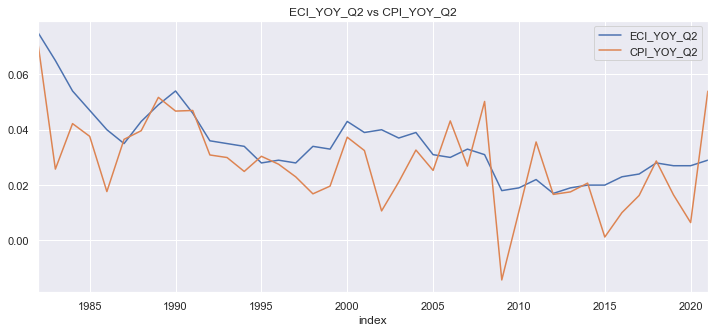

In [66]:

ECI_CPI[['ECI_YOY_Q2','CPI_YOY_Q2']].plot(figsize = (12,5),legend = True,title= 'ECI_YOY_Q2 vs CPI_YOY_Q2')
plt.show()


## Scatter Plot

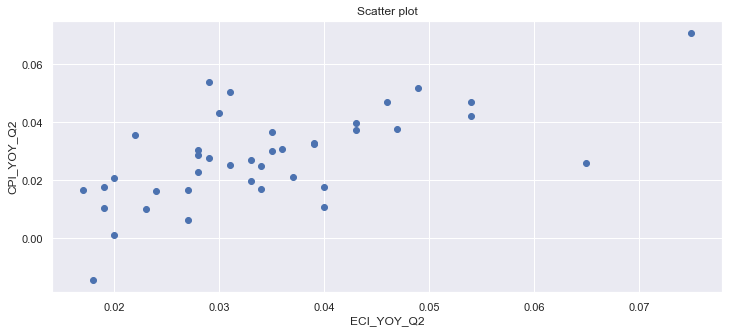

In [67]:
plt.figure(figsize = (12,5))
plt.scatter(ECI_CPI['ECI_YOY_Q2'],ECI_CPI['CPI_YOY_Q2'])
plt.xlabel("ECI_YOY_Q2")
plt.ylabel("CPI_YOY_Q2")
plt.title("Scatter plot")

plt.show()
# the scatter plot shows the same result that there is a postive relationship between ECI and CPI 

## Correlation

In [69]:
correlation = ECI_CPI['ECI_YOY_Q2'].corr(ECI_CPI['CPI_YOY_Q2'])
correlation

0.6410943379473606

We see that the correlation is 0.6812, which is fairly strong

## Test for stationarity

### Augmented Dickey Fuller Test

In [70]:
ADF(ECI_CPI['CPI_YOY_Q2'],'CPI_YOY_Q2')

The Augmented Dickey Fuller Test: CPI_YOY_Q2
ADF test Statistic          -5.619738
p-value                      0.000001
lags used                    0.000000
observations                39.000000
the critical value (1%)     -3.610400
the critical value (5%)     -2.939109
the critical value (10%)    -2.608063
Reject the null hypothesis
The CPI_YOY_Q2 series is stationary


In [71]:
ADF(ECI_CPI['ECI_YOY_Q2'],'ECI_YOY_Q2')

The Augmented Dickey Fuller Test: ECI_YOY_Q2
ADF test Statistic          -3.729902
p-value                      0.003712
lags used                    0.000000
observations                39.000000
the critical value (1%)     -3.610400
the critical value (5%)     -2.939109
the critical value (10%)    -2.608063
Reject the null hypothesis
The ECI_YOY_Q2 series is stationary


Both CPI_YOY_Q2 & ECI_YOY_Q2 are stationary.

## Test for Cointegration

### Johansen Test

In [78]:
cointegration_test(ECI_CPI['ECI_YOY_Q2'],ECI_CPI['CPI_YOY_Q2'],'ECI_YOY_Q2 vs CPI_YOY_Q2')

The Johansen cointegration test for ECI_YOY_Q2 vs CPI_YOY_Q2 is: 
t -statistic                   -3.599121
#p value                        0.024563
 the critical value 1% is :    -4.199301
 the critical value 2% is :    -3.497285
 the critical value 3% is :    -3.154987


Reject the Null hypothesis
The series are cointegrated  




### The Engle-Granger Cointegration Test

In [85]:
eg_test = engle_granger(ECI_CPI['ECI_YOY_Q2'], ECI_CPI['CPI_YOY_Q2'], trend="c")
eg_test

Test Statistic,-3.371
P-value,0.046
ADF Lag length,0
Estimated Root ρ (γ+1),0.540


Johansen Test- P-value is less than 0.05, We reject the Null Hypothesis and confirm that CPI_YOY_Q2 & ECI_YOY_Q2 are cointegrated

EG Test-  P-value is less than 0.05, We reject the Null Hypothesis and confirm that CPI_YOY_Q2 & ECI_YOY_Q2 are cointegrated

# ECI_YOY_Q3 vs CPI_YOY_Q3

## Line Plot

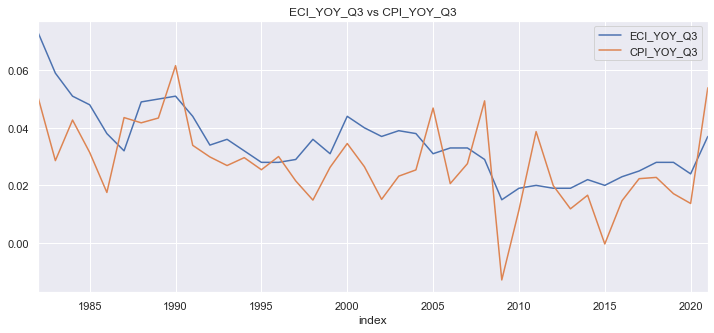

In [86]:

ECI_CPI[['ECI_YOY_Q3','CPI_YOY_Q3']].plot(figsize = (12,5),legend = True,title= 'ECI_YOY_Q3 vs CPI_YOY_Q3')
plt.show()


## Scatter Plot

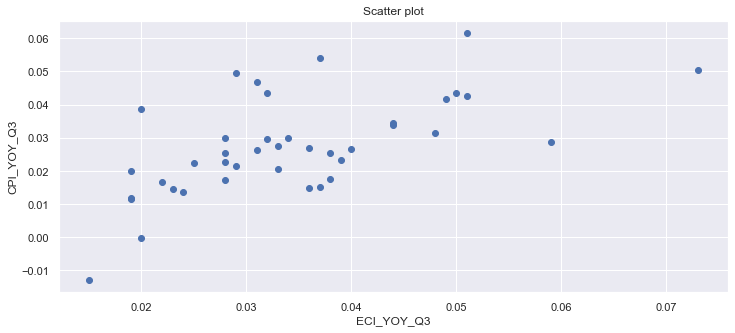

In [87]:
plt.figure(figsize = (12,5))
plt.scatter(ECI_CPI['ECI_YOY_Q3'],ECI_CPI['CPI_YOY_Q3'])
plt.xlabel("ECI_YOY_Q3")
plt.ylabel("CPI_YOY_Q3")
plt.title("Scatter plot")

plt.show()


## Correlation

In [88]:
correlation = ECI_CPI['ECI_YOY_Q3'].corr(ECI_CPI['CPI_YOY_Q3'])
correlation

0.6139324796698843

We see that the correlation is 0.6504, which is fairly strong

## Test for Stationarity

### Augmented Dickey Fuller Test

In [89]:
ADF(ECI_CPI['CPI_YOY_Q3'],'CPI_YOY_Q3')

The Augmented Dickey Fuller Test: CPI_YOY_Q3
ADF test Statistic          -4.994851
p-value                      0.000023
lags used                    0.000000
observations                39.000000
the critical value (1%)     -3.610400
the critical value (5%)     -2.939109
the critical value (10%)    -2.608063
Reject the null hypothesis
The CPI_YOY_Q3 series is stationary


In [90]:
ADF(ECI_CPI['ECI_YOY_Q3'],'ECI_YOY_Q3')

The Augmented Dickey Fuller Test: ECI_YOY_Q3
ADF test Statistic          -3.639064
p-value                      0.005057
lags used                    0.000000
observations                39.000000
the critical value (1%)     -3.610400
the critical value (5%)     -2.939109
the critical value (10%)    -2.608063
Reject the null hypothesis
The ECI_YOY_Q3 series is stationary


Both CPI_YOY_Q3 & ECI_YOY_Q3 are stationary.

## Test for Cointegration

### Johansen Test

In [91]:
cointegration_test(ECI_CPI['ECI_YOY_Q3'],ECI_CPI['CPI_YOY_Q3'],'ECI_YOY_Q3 vs CPI_YOY_Q3')

The Johansen cointegration test for ECI_YOY_Q3 vs CPI_YOY_Q3 is: 
t -statistic                   -2.641765
#p value                        0.221219
 the critical value 1% is :    -4.199301
 the critical value 2% is :    -3.497285
 the critical value 3% is :    -3.154987


We Accept the Null hypothesis
There is no cointegration between the series 




### The Engle-Granger Cointegration Test

In [98]:
eg_test = engle_granger(ECI_CPI['ECI_YOY_Q3'], ECI_CPI['CPI_YOY_Q3'], trend="ctt")
eg_test

Test Statistic,-3.944
P-value,0.086
ADF Lag length,0
Estimated Root ρ (γ+1),0.488


Johansen Test- P-value is greater than 0.05, We accept the Null Hypothesis and confirm that CPI_YOY_Q3 & ECI_YOY_Q3 are not cointegrated

EG Test- P-value is greater than 0.05, We accept the Null Hypothesis and confirm that CPI_YOY_Q3 & ECI_YOY_Q3 are not cointegrated

# ECI_YOY_Q4 vs CPI_YOY_Q4

## Line Plot

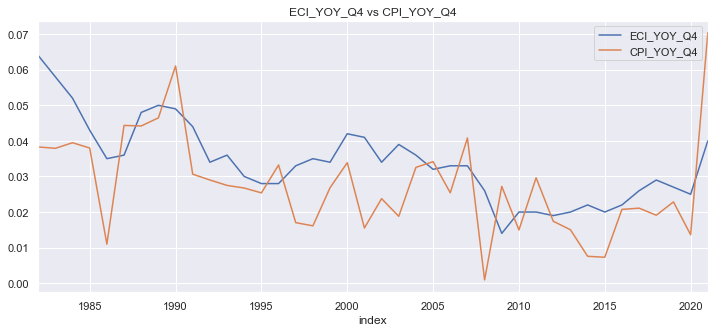

In [99]:

ECI_CPI[['ECI_YOY_Q4','CPI_YOY_Q4']].plot(figsize = (12,5),legend = True,title= 'ECI_YOY_Q4 vs CPI_YOY_Q4')
plt.show()


## Scatter Plot

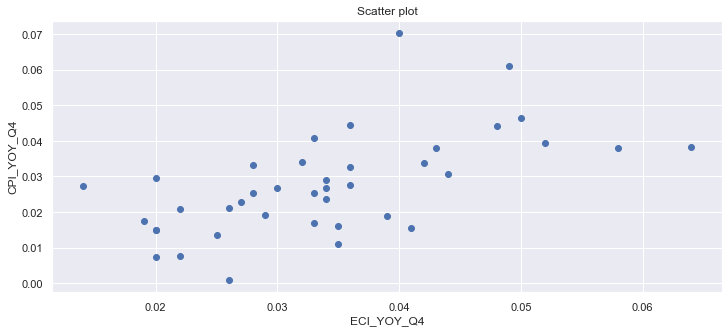

In [100]:
plt.figure(figsize = (12,5))
plt.scatter(ECI_CPI['ECI_YOY_Q4'],ECI_CPI['CPI_YOY_Q4'])
plt.xlabel("ECI_YOY_Q4")
plt.ylabel("CPI_YOY_Q4")
plt.title("Scatter plot")

plt.show()


## Correlation

In [101]:
correlation = ECI_CPI['CPI_YOY_Q4'].corr(ECI_CPI['ECI_YOY_Q4'])
correlation

0.5932178980366465

We see that the correlation is 0.651, which is fairly strong

## Test for Stationarity

### Augmented Dickey Fuller Test

In [102]:
ADF(ECI_CPI['CPI_YOY_Q4'],'CPI_YOY_Q4')

The Augmented Dickey Fuller Test: CPI_YOY_Q4
ADF test Statistic          -4.174703
p-value                      0.000727
lags used                    0.000000
observations                39.000000
the critical value (1%)     -3.610400
the critical value (5%)     -2.939109
the critical value (10%)    -2.608063
Reject the null hypothesis
The CPI_YOY_Q4 series is stationary


In [103]:
ADF(ECI_CPI['ECI_YOY_Q4'],'ECI_YOY_Q4')

The Augmented Dickey Fuller Test: ECI_YOY_Q4
ADF test Statistic          -2.914818
p-value                      0.043652
lags used                    0.000000
observations                39.000000
the critical value (1%)     -3.610400
the critical value (5%)     -2.939109
the critical value (10%)    -2.608063
Reject the null hypothesis
The ECI_YOY_Q4 series is stationary


Both CPI_YOY_Q4 & ECI_YOY_Q4 are stationary.

## Test for Cointegration

### Johansen Test

In [104]:
cointegration_test(ECI_CPI['ECI_YOY_Q4'],ECI_CPI['CPI_YOY_Q4'],'ECI_YOY_Q4 vs CPI_YOY_Q4')

The Johansen cointegration test for ECI_YOY_Q4 vs CPI_YOY_Q4 is: 
t -statistic                   -3.019800
#p value                        0.105574
 the critical value 1% is :    -4.199301
 the critical value 2% is :    -3.497285
 the critical value 3% is :    -3.154987


We Accept the Null hypothesis
There is no cointegration between the series 




### The Engle-Granger Cointegration Test

In [105]:
eg_test = engle_granger(ECI_CPI['ECI_YOY_Q4'], ECI_CPI['CPI_YOY_Q4'], trend="ctt")
eg_test

Test Statistic,-3.763
P-value,0.129
ADF Lag length,0
Estimated Root ρ (γ+1),0.498


Johansen Test- P-value is greater than 0.05, We accept the Null Hypothesis and confirm that CPI_YOY_Q4 & ECI_YOY_Q4 are not cointegrated

EG Test- P-value is greater than 0.05, We accept the Null Hypothesis and confirm that CPI_YOY_Q4 & ECI_YOY_Q4 are not cointegrated

# ALL_Quarters

In [210]:
date = pd.date_range(start = '1982-04-01',end= '2022-01-01',freq = 'Q')
date

DatetimeIndex(['1982-06-30', '1982-09-30', '1982-12-31', '1983-03-31',
               '1983-06-30', '1983-09-30', '1983-12-31', '1984-03-31',
               '1984-06-30', '1984-09-30',
               ...
               '2019-09-30', '2019-12-31', '2020-03-31', '2020-06-30',
               '2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30',
               '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', length=159, freq='Q-DEC')

In [211]:
date = date.to_period('Q')
date

PeriodIndex(['1982Q2', '1982Q3', '1982Q4', '1983Q1', '1983Q2', '1983Q3',
             '1983Q4', '1984Q1', '1984Q2', '1984Q3',
             ...
             '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4',
             '2021Q1', '2021Q2', '2021Q3', '2021Q4'],
            dtype='period[Q-DEC]', length=159, freq='Q-DEC')

We generated a series of data starting from 1982 Q1 till 2021Q4 on a quarterly basis

In [212]:
ECI_CPI_Q = pd.read_excel('Average YOY_original.xlsx',sheet_name='ALL-Quarters')
ECI_CPI_Q.columns
ECI_CPI_Q.head()
#pulled the ECI vs CPI data

,ECI_YOY,CPI_YOY,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,0.075,0.070640,NaN,NaN,NaN,NaN,NaN,NaN
1,0.073,0.050429,NaN,NaN,NaN,NaN,NaN,NaN
2,0.064,0.038298,NaN,NaN,NaN,NaN,NaN,NaN
3,0.066,0.035979,NaN,NaN,NaN,NaN,NaN,NaN
4,0.065,0.025773,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
ECI_CPI_Q = ECI_CPI_Q.iloc[:,0:2]
ECI_CPI_Q.count()

ECI_YOY    159
CPI_YOY    159
dtype: int64

In [214]:
ECI_CPI_Q.head()

,ECI_YOY,CPI_YOY
0,0.075,0.070640
1,0.073,0.050429
2,0.064,0.038298
3,0.066,0.035979
4,0.065,0.025773


In [215]:
ECI_CPI_Q.tail()

,ECI_YOY,CPI_YOY
154,0.025,0.013620
155,0.026,0.026198
156,0.029,0.053915
157,0.037,0.053903
158,0.040,0.070364


In [216]:
ECI_CPI_Q['index'] = date

In [217]:
ECI_CPI_Q.set_index("index",inplace =True) 

We club the quarterly data with the ECI vs CPI data

In [218]:
ECI_CPI_Q.head()

,ECI_YOY,CPI_YOY
index,,
1982Q2,0.075,0.070640
1982Q3,0.073,0.050429
1982Q4,0.064,0.038298
1983Q1,0.066,0.035979
1983Q2,0.065,0.025773


In [219]:
ECI_CPI_Q.tail()

,ECI_YOY,CPI_YOY
index,,
2020Q4,0.025,0.013620
2021Q1,0.026,0.026198
2021Q2,0.029,0.053915
2021Q3,0.037,0.053903
2021Q4,0.040,0.070364


In [220]:
type(ECI_CPI_Q.index)
# we ensured that the index of our data is a  period index since we would be testing the data for 
#stationarity and cointegration, it is important for the data to a time series data.

pandas.core.indexes.period.PeriodIndex

In [221]:
ECI_CPI_Q

,ECI_YOY,CPI_YOY
index,,
1982Q2,0.075,0.070640
1982Q3,0.073,0.050429
1982Q4,0.064,0.038298
1983Q1,0.066,0.035979
1983Q2,0.065,0.025773
...,...,...
2020Q4,0.025,0.013620
2021Q1,0.026,0.026198
2021Q2,0.029,0.053915


# ECI_YOY vs CPI_YOY

## Line Plot

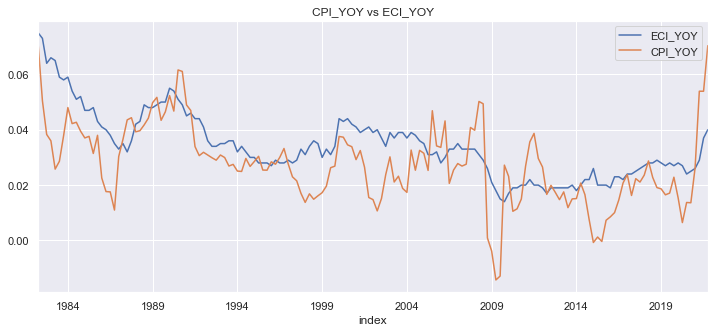

In [222]:
ECI_CPI_Q[['ECI_YOY','CPI_YOY']].plot(figsize = (12,5),legend = True,title= 'CPI_YOY vs ECI_YOY')
plt.show()


## Scatter Plot

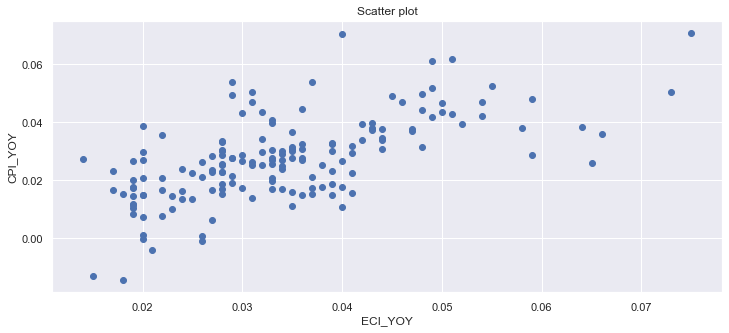

In [223]:
plt.figure(figsize = (12,5))
plt.scatter(ECI_CPI_Q['ECI_YOY'],ECI_CPI_Q['CPI_YOY'])
plt.xlabel("ECI_YOY")
plt.ylabel("CPI_YOY")
plt.title("Scatter plot")

plt.show()

## Correlation

In [224]:
correlation = ECI_CPI_Q['CPI_YOY'].corr(ECI_CPI_Q['ECI_YOY'])
correlation

0.6301546750967221

We see that the correlation is 0.6301, which is fairly strong

## Test for Stationarity

### Augmented Dickey Fuller Test

In [225]:
ADF(ECI_CPI_Q['CPI_YOY'],'CPI_YOY')

The Augmented Dickey Fuller Test: CPI_YOY
ADF test Statistic           -2.438992
p-value                       0.131032
lags used                     9.000000
observations                149.000000
the critical value (1%)      -3.475018
the critical value (5%)      -2.881141
the critical value (10%)     -2.577221
Accept the null hypothesis
The CPI_YOY series is non-stationary 


In [226]:
ADF(ECI_CPI_Q['ECI_YOY'],'ECI_YOY')

The Augmented Dickey Fuller Test: ECI_YOY
ADF test Statistic           -2.609263
p-value                       0.091098
lags used                     8.000000
observations                150.000000
the critical value (1%)      -3.474715
the critical value (5%)      -2.881009
the critical value (10%)     -2.577151
Accept the null hypothesis
The ECI_YOY series is non-stationary 


Both CPI_YOY & ECI_YOY are non-stationary.

## Tests for Cointegration

### Johansen Test

In [227]:
cointegration_test(ECI_CPI_Q['ECI_YOY'],ECI_CPI_Q['CPI_YOY'],'CPI_YOY vs ECI_YOY')

The Johansen cointegration test for CPI_YOY vs ECI_YOY is: 
t -statistic                   -2.413256
#p value                        0.318603
 the critical value 1% is :    -3.967099
 the critical value 2% is :    -3.375075
 the critical value 3% is :    -3.071402


We Accept the Null hypothesis
There is no cointegration between the series 




### The Engle-Granger Cointegration Test

In [228]:
eg_test = engle_granger(ECI_CPI_Q['ECI_YOY'], ECI_CPI_Q['CPI_YOY'], trend="ctt")
eg_test

Test Statistic,-2.926
P-value,0.504
ADF Lag length,4
Estimated Root ρ (γ+1),0.878


Johansen Test- P-value is greater than 0.05, We accept the Null Hypothesis and confirm that CPI_YOY & ECI_YOY are not cointegrated


EG Test- P-value is greater than 0.05, We accept the Null Hypothesis and confirm that CPI_YOY & ECI_YOY are not cointegrated

Refer to the below support: 

In [268]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
        values 0, 1, ..., maxlag.
    
        * If "AIC" (default)

In [542]:
help(ts.coint)

Help on function coint in module statsmodels.tsa.stattools:

coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)
    Test for no-cointegration of a univariate equation.
    
    The null hypothesis is no cointegration. Variables in y0 and y1 are
    assumed to be integrated of order 1, I(1).
    
    This uses the augmented Engle-Granger two-step cointegration test.
    Constant or trend is included in 1st stage regression, i.e. in
    cointegrating equation.
    
    **Warning:** The autolag default has changed compared to statsmodels 0.8.
    In 0.8 autolag was always None, no the keyword is used and defaults to
    "aic". Use `autolag=None` to avoid the lag search.
    
    Parameters
    ----------
    y0 : array_like
        The first element in cointegrated system. Must be 1-d.
    y1 : array_like
        The remaining elements in cointegrated system.
    trend : str {"c", "ct"}
        The trend term included in regression for cointegrating eq

In [543]:
help(engle_granger)

Help on function engle_granger in module arch.unitroot._engle_granger:

engle_granger(y: 'ArrayLike1D', x: 'ArrayLike2D', trend: 'UnitRootTrend' = 'c', *, lags: 'Optional[int]' = None, max_lags: 'Optional[int]' = None, method: "Literal[('aic', 'bic', 't-stat')]" = 'bic') -> 'EngleGrangerTestResults'
    Test for cointegration within a set of time series.
    
    Parameters
    ----------
    y : array_like
        The left-hand-side variable in the cointegrating regression.
    x : array_like
        The right-hand-side variables in the cointegrating regression.
    trend : {"n","c","ct","ctt"}, default "c"
        Trend to include in the cointegrating regression. Trends are:
    
        * "n": No deterministic terms
        * "c": Constant
        * "ct": Constant and linear trend
        * "ctt": Constant, linear and quadratic trends
    lags : int, default None
        The number of lagged differences to include in the Augmented
        Dickey-Fuller test used on the residuals of 